In [1]:
import pandas as pd
import pathlib as path



import requests
import json
from pprint import pprint

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

# IMPORT FILES

In [2]:
### import and read csv file

path = '../Output/immigrants_by_country_monthly.csv'
imm_df = pd.read_csv(path)
imm_df = imm_df.rename(columns={'total':'Immigration_flow'})

imm_df.head(5)

,index,country,year,month_str,month_int,quarter,immigration_flow
0,0,Afghanistan,2015,Feb,2,Q1,125
1,1,Albania,2015,Feb,2,Q1,25
2,2,Algeria,2015,Feb,2,Q1,125
3,3,Antigua and Barbuda,2015,Feb,2,Q1,5
4,4,Argentina,2015,Feb,2,Q1,15


In [3]:
### import and read csv file

path = '../Output/countries_UN_referential.csv'
countries_df = pd.read_csv(path)


countries_df.head(5)

,iso3Code,iso2Code,country,region,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.51670
1,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.52280
2,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.2420,-8.81155
3,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.33170
4,AND,AD,Andorra,Europe & Central Asia,Andorra la Vella,1.5218,42.50750


In [4]:
### import and read csv file

path = '../Output/macro_economic_data.csv'
macro_data_df = pd.read_csv(path)

# #drop Nan values
# macro_data_df = macro_data_df['value'].dropna(how="all")

macro_data_df.head(5)

,index,indicator,country,iso3Code,iso2Code,year,value
0,0,Access to clean fuels and technologies for coo...,Afghanistan,AFG,AF,2015,27.6
1,1,Access to clean fuels and technologies for coo...,Albania,ALB,AL,2015,76.6
2,2,Access to clean fuels and technologies for coo...,Algeria,DZA,DZ,2015,99.6
3,3,Access to clean fuels and technologies for coo...,Andorra,AND,AD,2015,100.0
4,4,Access to clean fuels and technologies for coo...,Angola,AGO,AO,2015,47.3


In [5]:
### import and read csv file

path = '../Output/corruption_perception_index.csv'
cpi_df = pd.read_csv(path)


# cpi_df = cpi_df[['country', 'iso3Code', 'CPI score 2023' ]]

cpi_df.head(5)

,country,iso3Code,CPI_score_2023
0,Denmark,DNK,90
1,Finland,FIN,87
2,New Zealand,NZL,85
3,Norway,NOR,84
4,Singapore,SGP,83


In [6]:
### import and read csv file

path = '../Output/Global_Peace_Index.csv'
gpi_df = pd.read_csv(path)

gpi_df.head(5)


,country,Global_Peace_Index_2023
0,Afghanistan,3.294
1,Albania,1.809
2,Algeria,2.110
3,Angola,2.043
4,Argentina,1.855


# immigration flow per year

In [7]:
immigration_year = imm_df.groupby(['year'])['immigration_flow'].sum()
immigration_year

year
2015    271155
2016    295675
2017    285795
2018    320300
2019    340460
2020    183605
2021    405185
2022    436820
2023    471040
2024    482755
Name: immigration_flow, dtype: int64

<Axes: title={'center': 'Flow immigration per year'}, xlabel='year', ylabel='Flow immigration'>

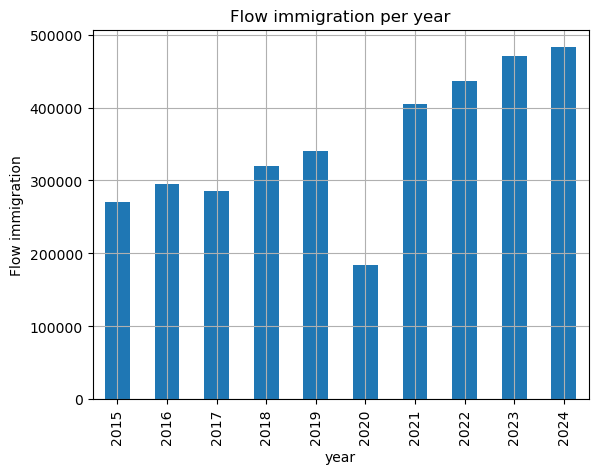

In [8]:
# visualization

ax = immigration_year.plot(kind='bar')
ax.set_title('Flow immigration per year')
ax.set_ylabel('Flow immigration')
ax.grid()
ax

# Immigration by country for period 2015 and 2024

In [9]:
immigration_country = imm_df.groupby(['country'])['immigration_flow'].sum()
immigration_country

country
Afghanistan           82620
Albania                5615
Algeria               40685
American Samoa            0
Andorra                   0
                      ...  
Viet Nam              41975
West Bank and Gaza     6025
Yemen, Rep.            6030
Zambia                  620
Zimbabwe               4705
Name: immigration_flow, Length: 204, dtype: int64

# Immigration by country and by year

In [10]:
immigration_country_year = imm_df.groupby(['country', 'year'])['immigration_flow'].sum()
immigration_country_year = immigration_country_year.reset_index()
immigration_country_year

,country,year,immigration_flow
0,Afghanistan,2015,2625
1,Afghanistan,2016,2655
2,Afghanistan,2017,3460
3,Afghanistan,2018,3560
4,Afghanistan,2019,3890
...,...,...,...
1853,Zimbabwe,2020,335
1854,Zimbabwe,2021,505
1855,Zimbabwe,2022,615
1856,Zimbabwe,2023,555


# Top 20 of immigration flow

In [11]:
# select 20 top countries for a vizualisation

immigration_country_20 = immigration_country.reset_index()
immigration_country_20 = immigration_country_20.sort_values('immigration_flow', ascending=False).head(20)
immigration_country_20['Immigration_flow (000`)'] = immigration_country_20['immigration_flow'] / 1000

immigration_country_20 = immigration_country_20.drop(columns = {'immigration_flow'})
immigration_country_20 = immigration_country_20.set_index('country').sort_values('Immigration_flow (000`)')
immigration_country_20

,Immigration_flow (000`)
country,
Jamaica,37.040
Morocco,39.235
Algeria,40.685
Mexico,41.480
Viet Nam,41.975
"Korea, Rep.",49.565
Brazil,51.110
United Kingdom,51.375
Cameroon,54.925


<Axes: title={'center': 'Immigration by country from 2015-2024'}, ylabel='country'>

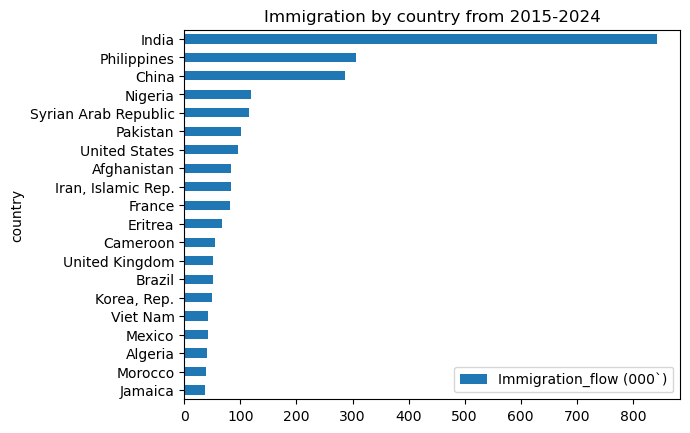

In [12]:
# visualization

ax = immigration_country_20.plot(kind = "barh")
ax.set_title("Immigration by country from 2015-2024")
ax

# full indicators data 
with indicators aggregated by mean

### macro_data average
calculate average value of indicators for the period

In [13]:
# check shape of DF before and after replace NAN

print(f'size before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'size after{macro_data_df_clean.shape}')

size before(71631, 7)
size after(71244, 7)


In [14]:
macro_data_df_clean

,index,indicator,country,iso3Code,iso2Code,year,value
0,0,Access to clean fuels and technologies for coo...,Afghanistan,AFG,AF,2015,27.600
1,1,Access to clean fuels and technologies for coo...,Albania,ALB,AL,2015,76.600
2,2,Access to clean fuels and technologies for coo...,Algeria,DZA,DZ,2015,99.600
3,3,Access to clean fuels and technologies for coo...,Andorra,AND,AD,2015,100.000
4,4,Access to clean fuels and technologies for coo...,Angola,AGO,AO,2015,47.300
...,...,...,...,...,...,...,...
71626,71626,"Unemployment, total (% of total labor force) (...",Viet Nam,VNM,VN,2023,1.645
71627,71627,"Unemployment, total (% of total labor force) (...",West Bank and Gaza,PSE,PS,2023,24.420
71628,71628,"Unemployment, total (% of total labor force) (...","Yemen, Rep.",YEM,YE,2023,17.091
71629,71629,"Unemployment, total (% of total labor force) (...",Zambia,ZMB,ZM,2023,5.905


In [15]:
macro_data_avg_df = macro_data_df_clean.groupby(['country', 'iso3Code', 'indicator'])['value'].mean() 
macro_data_avg_df

country      iso3Code  indicator                                                                                    
Afghanistan  AFG       Access to clean fuels and technologies for cooking (% of population)                              32.400000
                       Access to electricity (% of population)                                                           91.555556
                       Agricultural land (% of land area)                                                                58.432353
                       Armed forces personnel (% of total labor force)                                                    2.681272
                       Average precipitation in depth (mm per year)                                                     327.000000
                                                                                                                           ...    
Zimbabwe     ZWE       Total debt service (% of exports of goods, services and primary income)   

In [16]:
macro_data_avg_df= macro_data_avg_df.reset_index()
macro_data_avg_df

,country,iso3Code,indicator,value
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,32.400000
1,Afghanistan,AFG,Access to electricity (% of population),91.555556
2,Afghanistan,AFG,Agricultural land (% of land area),58.432353
3,Afghanistan,AFG,Armed forces personnel (% of total labor force),2.681272
4,Afghanistan,AFG,Average precipitation in depth (mm per year),327.000000
...,...,...,...,...
7911,Zimbabwe,ZWE,"Total debt service (% of exports of goods, ser...",17.119102
7912,Zimbabwe,ZWE,Unemployment with advanced education (% of tot...,3.360000
7913,Zimbabwe,ZWE,Unemployment with basic education (% of total ...,4.292667
7914,Zimbabwe,ZWE,Unemployment with intermediate education (% of...,5.949778


### pivot the table to have the indicators as columns

In [17]:
macro_data_avg_pivot = macro_data_avg_df.pivot(index=['country', 'iso3Code'], columns='indicator', values='value')
macro_data_avg_pivot

,indicator,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,Cost of business start-up procedures (% of GNI per capita),...,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
country,iso3Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,-1.370160,17.955556,...,NaN,48.444444,8.500000,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111
Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,-0.500036,11.122222,...,18.255556,19.988889,4.666667,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667
Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,-0.639697,11.422222,...,NaN,NaN,18.000000,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889
American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,1.411231,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,1.211647,NaN,...,NaN,NaN,NaN,10.430000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,-0.447265,47.044444,...,18.222222,25.955556,43.500000,NaN,NaN,NaN,30.662889,22.519000,24.193444,25.038000
"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,-1.655679,60.388889,...,NaN,NaN,40.500000,0.036667,0.541611,15.049805,NaN,NaN,NaN,17.822111


In [18]:
macro_data_avg_pivot  = macro_data_avg_pivot.reset_index()
macro_data_avg_pivot

indicator,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,...,NaN,48.444444,8.500000,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,18.255556,19.988889,4.666667,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,...,NaN,NaN,18.000000,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889
3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,...,NaN,NaN,NaN,10.430000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Vietnam,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,...,18.222222,25.955556,43.500000,NaN,NaN,NaN,30.662889,22.519000,24.193444,25.038000
203,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,...,NaN,NaN,40.500000,0.036667,0.541611,15.049805,NaN,NaN,NaN,17.822111
204,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,91.488889,55.644444,8.500000,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778


### Add Immigration flow

In [19]:
imm_vs_macrodata_df = pd.merge(macro_data_avg_pivot,immigration_country, on='country')

imm_vs_macrodata_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,Poverty headcount ratio at national poverty lines (% of population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,...,48.444444,8.500000,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,82620
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,19.988889,4.666667,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,5615
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,...,NaN,18.000000,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,40685
3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,...,NaN,NaN,10.430000,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,NaN,163.357704,...,5.311111,18.111111,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41975
199,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,...,25.955556,43.500000,NaN,NaN,NaN,30.662889,22.519000,24.193444,25.038000,6025
200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,...,NaN,40.500000,0.036667,0.541611,15.049805,NaN,NaN,NaN,17.822111,6030
201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,55.644444,8.500000,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,620


### calculate a ratio of immigrants per 100K of the population
this will allow to compare between the countries

In [20]:
imm_vs_macrodata_df['immigration_100k'] = imm_vs_macrodata_df['immigration_flow'] / imm_vs_macrodata_df['Population, total'] * 100000
imm_vs_macrodata_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,...,8.500000,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,82620,218.749241
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,4.666667,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,5615,197.990096
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,...,18.000000,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,40685,94.177289
3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,...,NaN,10.430000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,NaN,163.357704,...,18.111111,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41975,43.300050
199,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,...,43.500000,NaN,NaN,NaN,30.662889,22.519000,24.193444,25.038000,6025,128.246720
200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,...,40.500000,0.036667,0.541611,15.049805,NaN,NaN,NaN,17.822111,6030,17.149918
201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,8.500000,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,620,3.345682


In [21]:
imm_vs_macrodata_df = imm_vs_macrodata_df.reset_index()
imm_vs_macrodata_df

,index,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k
0,0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,...,8.500000,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,82620,218.749241
1,1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,...,4.666667,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,5615,197.990096
2,2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,...,18.000000,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,40685,94.177289
3,3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
4,4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,...,NaN,10.430000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,NaN,...,18.111111,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41975,43.300050
199,199,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,...,43.500000,NaN,NaN,NaN,30.662889,22.519000,24.193444,25.038000,6025,128.246720
200,200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,...,40.500000,0.036667,0.541611,15.049805,NaN,NaN,NaN,17.822111,6030,17.149918
201,201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,...,8.500000,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,620,3.345682


### Add Corruption indicator

In [22]:
# add CPI index by merging with cpi df

full_indicators_countries_df = pd.merge(imm_vs_macrodata_df,cpi_df, how='left' ,  on='iso3Code')

full_indicators_countries_df = full_indicators_countries_df.drop(columns=['country_y', 'index'])

full_indicators_countries_df = full_indicators_countries_df.rename(columns={'country_x' : 'country'})

full_indicators_countries_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,CPI_score_2023
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,...,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,82620,218.749241,20.0
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,5615,197.990096,37.0
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,...,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,40685,94.177289,36.0
3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN
4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,...,10.430000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,NaN,163.357704,...,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41975,43.300050,41.0
199,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,...,NaN,NaN,NaN,30.662889,22.519000,24.193444,25.038000,6025,128.246720,NaN
200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,...,0.036667,0.541611,15.049805,NaN,NaN,NaN,17.822111,6030,17.149918,16.0
201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,620,3.345682,37.0


### Add Global peace indicator

In [23]:
# add GPI index by merging with gpi df

full_indicators_countries_df = pd.merge(full_indicators_countries_df, gpi_df, how='left' ,  on='country')


full_indicators_countries_df

,country,iso3Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,CPI_score_2023,Global_Peace_Index_2023
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,...,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,82620,218.749241,20.0,3.294
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,5615,197.990096,37.0,1.809
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,...,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,40685,94.177289,36.0,2.110
3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN
4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,NaN,163.357704,...,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41975,43.300050,41.0,1.802
199,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,...,NaN,NaN,30.662889,22.519000,24.193444,25.038000,6025,128.246720,NaN,2.872
200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,...,0.541611,15.049805,NaN,NaN,NaN,17.822111,6030,17.149918,16.0,3.397
201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,620,3.345682,37.0,1.948


### other cleaning

In [24]:
## Rename the indicators to be more ... friendly

full_indicators_countries_df = full_indicators_countries_df.rename(columns={


                                            'Access to clean fuels and technologies for cooking (% of population)'    :   'clean fuels for cooking (% of population)'  ,
                                            'Access to electricity (% of population)'    :   'Access to electricity (% of population)'  ,
                                            'Agricultural land (% of land area)'    :   'Agricultural land (% )'  ,
                                            'Armed forces personnel (% of total labor force)'    :   'Armed forces (% labor force)'  ,
                                            'Average precipitation in depth (mm per year)'    :   'precipitation (mm per year)'  ,
                                            'Birth rate crude (per 1000 people)'    :   'Birth rate crude'  ,
                                            'Central government debt total (% of GDP)'    :   'government debt (% of GDP)'  ,
                                            'Consumer price index (2010 = 100) Control of Corruption: Estimate'    :   'Consumer price index (2010)'  ,
                                            'Cost of business start-up procedures (% of GNI per capita)'    :   'Cost of business start-up (% of GNI per capita)'  ,
                                            'Current account balance (% of GDP)'    :   'Current account balance (% of GDP)'  ,
                                            'Current health expenditure (% of GDP)'    :   'Current health expenditure (% of GDP)'  ,
                                            'Death rate crude (per 1000 people)'    :   'Death rate crude (per 1000 people)'  ,
                                            'Debt service (PPG and IMF only % of exports of goods services and primary income)'    :   'Debt service'  ,
                                            'Ease of doing business score (0 = lowest performance to 100 = best performance)'    :   'doing business score'  ,
                                            'Fertility rate total (births per woman)'    :   'Fertility rate per woman'  ,
                                            'Firms using banks to finance investment (% of firms)'    :   '% Firms using banks'  ,
                                            'GDP growth (annual %) GDP per capita (constant 2015 US$)'    :   'GDP per capita growth '  ,
                                            'GDP per capita PPP (constant 2021 international $)'    :   'GDP per capita PPP ( 2021)'  ,
                                            'GNI per capita (constant 2015 US$)'    :   'GNI per capita (2015 US$)'  ,
                                            'General government final consumption expenditure (% of GDP)'    :   'government  consumption exp (% of GDP)'  ,
                                            'Government expenditure on education total (% of GDP)'    :   'Government expenditure on education total (% of GDP)'  ,
                                            'Human Capital Index (HCI) (scale 0-1)'    :   'Human Capital Index'  ,
                                            'Industry (including construction) value added (% of GDP)'    :   'Industry (% of GDP)'  ,
                                            'Inflation consumer prices (annual %)'    :   'Inflation consumer prices (%)'  ,
                                            'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources'    :   'Level of water stress'  ,
                                            'Life expectancy at birth total (years)'    :   'Life expectancy at birth total (years)'  ,
                                            'Military expenditure (% of GDP)'    :   'Military expenditure (% of GDP)'  ,
                                            'Population density (people per sq. km of land area)'    :   'Population density'  ,
                                            'Population growth (annual %)'    :   'Population growth (annual %)'  ,
                                            'Population living in areas where elevation is below 5 meters (% of total population)'    :   '% of total population below 5 meters'  ,
                                            'Population living in slums (% of urban population)'    :   'Population living in slums (% of urban population)'  ,
                                            'Population total'    :   'Population total'  ,
                                            'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'    :   'Poverty $2.15 a day (% of population)'  ,
                                            'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'    :   'Poverty $3.65 a day (% of population)'  ,
                                            'Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)'    :   'Poverty $6.85 a day (% of population)'  ,
                                            'Poverty headcount ratio at national poverty lines (% of population)'    :   '%  Poverty headcount ratio '  ,
                                            'Time required to start a business (days)'    :   'Time to start a business (days)'  ,
                                            'Total alcohol consumption per capita (liters of pure alcohol projected estimates 15+ years of age)'    :   'Alcohol consumption per capita'  ,
                                            'Total debt service (% of GNI)'    :   'Total debt service (% of GNI)'  ,
                                            'Total debt service (% of exports of goods services and primary income)'    :   'Total debt service (% of exports)'  ,
                                            'Unemployment with advanced education (% of total labor force with advanced education)'    :   'Unemployment advanced education'  ,
                                            'Unemployment with basic education (% of total labor force with basic education)'    :   'Unemployment basic education '  ,
                                            'Unemployment with intermediate education (% of total labor force with intermediate education)'    :   'Unemployment intermediate education'  ,
                                            'Unemployment total (% of total labor force) (modeled ILO estimate)]'    :   'Unemployment total'  ,
                                            'CPI_score_2023' : 'Corruption index 2023'


                                                    })
full_indicators_countries_df

,country,iso3Code,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,Corruption index 2023,Global_Peace_Index_2023
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,...,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,82620,218.749241,20.0,3.294
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,5615,197.990096,37.0,1.809
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,...,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,40685,94.177289,36.0,2.110
3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN
4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,NaN,163.357704,...,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41975,43.300050,41.0,1.802
199,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,...,NaN,NaN,30.662889,22.519000,24.193444,25.038000,6025,128.246720,NaN,2.872
200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,...,0.541611,15.049805,NaN,NaN,NaN,17.822111,6030,17.149918,16.0,3.397
201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,620,3.345682,37.0,1.948


In [25]:
# Select needed columns and organize them
full_indicators_countries_df.columns

Index(['country', 'iso3Code', 'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of G

In [26]:
# Select needed columns and organize them


full_indicators_countries_df = full_indicators_countries_df[[
    
                                        'country', 'iso3Code', 
                                        'clean fuels for cooking (% of population)',
                                        'Access to electricity (% of population)', 'Agricultural land (% )',
                                        'Armed forces (% labor force)', 'precipitation (mm per year)',
                                        'Birth rate, crude (per 1,000 people)',
                                        'Central government debt, total (% of GDP)',
                                        'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                        'Cost of business start-up (% of GNI per capita)',
                                        'Current account balance (% of GDP)',
                                        'Current health expenditure (% of GDP)',
                                        'Death rate, crude (per 1,000 people)',
                                        'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
                                        'doing business score', 'Fertility rate, total (births per woman)',
                                        '% Firms using banks', 'GDP growth (annual %)',
                                        'GDP per capita (constant 2015 US$)',
                                        'GDP per capita, PPP (constant 2021 international $)',
                                        'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
                                        'Government expenditure on education, total (% of GDP)',
                                        'Human Capital Index',
                                        'Industry (including construction), value added (% of GDP)',
                                        'Inflation, consumer prices (annual %)', 'Level of water stress',
                                        'Life expectancy at birth, total (years)',
                                        'Military expenditure (% of GDP)', 'Population density',
                                        'Population growth (annual %)', '% of total population below 5 meters',
                                        'Population living in slums (% of urban population)',
                                        'Population, total', 'Poverty $2.15 a day (% of population)',
                                        'Poverty $3.65 a day (% of population)',
                                        'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
                                        'Time to start a business (days)',
                                        'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                        'Total debt service (% of GNI)',
                                        'Total debt service (% of exports of goods, services and primary income)',
                                        'Unemployment advanced education', 'Unemployment basic education ',
                                        'Unemployment intermediate education',
                                        'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                        'Corruption index 2023',
                                        'Global_Peace_Index_2023', 
                                        'immigration_100k'
                                          
                                          ]]

full_indicators_countries_df

,country,iso3Code,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,NaN,145.911664,...,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,20.0,3.294,218.749241
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,37.0,1.809,197.990096
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,NaN,156.133146,...,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,36.0,2.110,94.177289
3,American Samoa,ASM,NaN,NaN,14.150000,NaN,NaN,11.422222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,Andorra,AND,100.000000,100.000000,39.983452,NaN,NaN,6.466667,NaN,NaN,...,10.430000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,NaN,163.357704,...,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41.0,1.802,43.300050
199,West Bank and Gaza,PSE,NaN,99.977778,68.829501,0.000000,402.0,29.736444,NaN,113.583340,...,NaN,NaN,NaN,30.662889,22.519000,24.193444,25.038000,NaN,2.872,128.246720
200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,NaN,NaN,...,0.036667,0.541611,15.049805,NaN,NaN,NaN,17.822111,16.0,3.397,17.149918
201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,37.0,1.948,3.345682


In [27]:
full_indicators_countries_df = full_indicators_countries_df.fillna(0)
full_indicators_countries_df

,country,iso3Code,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,0.000000,145.911664,...,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,20.0,3.294,218.749241
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,37.0,1.809,197.990096
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,0.000000,156.133146,...,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,36.0,2.110,94.177289
3,American Samoa,ASM,0.000000,0.000000,14.150000,0.000000,0.0,11.422222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000
4,Andorra,AND,100.000000,100.000000,39.983452,0.000000,0.0,6.466667,0.000000,0.000000,...,10.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,0.000000,163.357704,...,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41.0,1.802,43.300050
199,West Bank and Gaza,PSE,0.000000,99.977778,68.829501,0.000000,402.0,29.736444,0.000000,113.583340,...,0.000000,0.000000,0.000000,30.662889,22.519000,24.193444,25.038000,0.0,2.872,128.246720
200,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,0.000000,0.000000,...,0.036667,0.541611,15.049805,0.000000,0.000000,0.000000,17.822111,16.0,3.397,17.149918
201,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,37.0,1.948,3.345682


In [28]:
full_indicators_countries_df = full_indicators_countries_df.reset_index()
full_indicators_countries_df.head(5)

,index,country,iso3Code,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,0.000000,...,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,20.0,3.294,218.749241
1,1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,...,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,37.0,1.809,197.990096
2,2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,0.000000,...,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,36.0,2.110,94.177289
3,3,American Samoa,ASM,0.000000,0.000000,14.150000,0.000000,0.0,11.422222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000
4,4,Andorra,AND,100.000000,100.000000,39.983452,0.000000,0.0,6.466667,0.000000,...,10.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000


In [29]:
# export to csv

full_indicators_countries_df.to_csv('../Output/full_indicators_by_country.csv', index=False)

# Create Full_indicators data by year
there will not be any aggregation

In [30]:
# check shape of DF before and after replace NAN

print(f'size before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'size after{macro_data_df_clean.shape}')

size before(71631, 7)
size after(71244, 7)


In [31]:
macro_data_df_clean

,index,indicator,country,iso3Code,iso2Code,year,value
0,0,Access to clean fuels and technologies for coo...,Afghanistan,AFG,AF,2015,27.600
1,1,Access to clean fuels and technologies for coo...,Albania,ALB,AL,2015,76.600
2,2,Access to clean fuels and technologies for coo...,Algeria,DZA,DZ,2015,99.600
3,3,Access to clean fuels and technologies for coo...,Andorra,AND,AD,2015,100.000
4,4,Access to clean fuels and technologies for coo...,Angola,AGO,AO,2015,47.300
...,...,...,...,...,...,...,...
71626,71626,"Unemployment, total (% of total labor force) (...",Viet Nam,VNM,VN,2023,1.645
71627,71627,"Unemployment, total (% of total labor force) (...",West Bank and Gaza,PSE,PS,2023,24.420
71628,71628,"Unemployment, total (% of total labor force) (...","Yemen, Rep.",YEM,YE,2023,17.091
71629,71629,"Unemployment, total (% of total labor force) (...",Zambia,ZMB,ZM,2023,5.905


In [32]:
# macro_data_avg_df = macro_data_df_clean.groupby(['country', 'iso3Code', 'indicator'])['value'].mean() 
# macro_data_avg_df

In [33]:
macrodata_country_year_df= macro_data_df_clean[['country', 'iso3Code', 'indicator', 'year' , 'value']]
macrodata_country_year_df

,country,iso3Code,indicator,year,value
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,2015,27.600
1,Albania,ALB,Access to clean fuels and technologies for coo...,2015,76.600
2,Algeria,DZA,Access to clean fuels and technologies for coo...,2015,99.600
3,Andorra,AND,Access to clean fuels and technologies for coo...,2015,100.000
4,Angola,AGO,Access to clean fuels and technologies for coo...,2015,47.300
...,...,...,...,...,...
71626,Viet Nam,VNM,"Unemployment, total (% of total labor force) (...",2023,1.645
71627,West Bank and Gaza,PSE,"Unemployment, total (% of total labor force) (...",2023,24.420
71628,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",2023,17.091
71629,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",2023,5.905


In [34]:
macrodata_country_year_pivot = macrodata_country_year_df.pivot(index=['country', 'iso3Code', 'year'], columns='indicator', values='value')
macrodata_country_year_pivot

indicator                  Access to clean fuels and technologies for cooking (% of population)  \
country     iso3Code year                                                                         
Afghanistan AFG      2015                                               27.6                      
                     2016                                               28.8                      
                     2017                                               30.3                      
                     2018                                               31.4                      
                     2019                                               32.6                      
...                                                                      ...                      
Zimbabwe    ZWE      2019                                               30.3                      
                     2020                                               30.5                      
                     2021                                               30.5                      
                     2022                                               30.8                      
                     2023                                               30.8                      

indicator                  Access to electricity (% of population)  \
country     iso3Code year                                            
Afghanistan AFG      2015                                     71.5   
                     2016                                     97.7   
                     2017                                     97.7   
                     2018                                     93.4   
                     2019                                     97.7   
...                                                            ...   
Zimbabwe    ZWE      2019                                     46.7   
                     2020                                     52.7   
                     2021                                     49.0   
                     2022                                     50.1   
                     2023                                     50.1   

indicator                  Agricultural land (% of land area)  \
country     iso3Code year                                       
Afghanistan AFG      2015                           58.123668   
                     2016                           58.123668   
                     2017                           58.123668   
                     2018                           58.276988   
                     2019                           58.276988   
...                                                       ...   
Zimbabwe    ZWE      2019                           39.518358   
                     2020                           39.754073   
                     2021                           39.385906   
                     2022                           39.489284   
                     2023                           39.489284   

indicator                  Armed forces personnel (% of total labor force)  \
country     iso3Code year                                                    
Afghanistan AFG      2015                                         3.724667   
                     2016                                         3.635915   
                     2017                                         3.501771   
                     2018                                         2.961201   
                     2019                                         3.023536   
...                                                                    ...   
Zimbabwe    ZWE      2019                                         0.883387   
                     2020                                         0.877221   
                     2021                                         0.877221   
                     2022                                         0.877221   
                   

In [35]:
macrodata_country_year_pivot  = macrodata_country_year_pivot.reset_index()
macrodata_country_year_pivot

indicator,country,iso3Code,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,NaN,...,NaN,0.0,8.5,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,NaN,...,NaN,54.5,8.5,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,NaN,...,NaN,54.5,8.5,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,NaN,...,NaN,54.5,8.5,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,NaN,...,NaN,54.5,8.5,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,NaN,...,85.0,38.3,27.0,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373
1850,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,NaN,...,85.0,38.3,27.0,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621
1851,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,NaN,...,85.0,38.3,27.0,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540
1852,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,NaN,...,85.0,38.3,27.0,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087


In [36]:
imm_vs_macrodata_country_year_df = pd.merge(macrodata_country_year_pivot,immigration_country_year, on=['country','year'])

imm_vs_macrodata_country_year_df

,country,iso3Code,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Poverty headcount ratio at national poverty lines (% of population),Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,NaN,...,0.0,8.5,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,2625
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,NaN,...,54.5,8.5,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,2655
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,NaN,...,54.5,8.5,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,3460
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,NaN,...,54.5,8.5,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,3560
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,NaN,...,54.5,8.5,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,3890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,NaN,...,38.3,27.0,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,560
1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,NaN,...,38.3,27.0,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,335
1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,NaN,...,38.3,27.0,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,505
1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,NaN,...,38.3,27.0,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,615


In [37]:
imm_vs_macrodata_country_year_df['immigration_100k'] = imm_vs_macrodata_country_year_df['immigration_flow'] / imm_vs_macrodata_country_year_df['Population, total'] * 100000
imm_vs_macrodata_country_year_df

,country,iso3Code,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Time required to start a business (days),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,NaN,...,8.5,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,2625,7.758981
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,NaN,...,8.5,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,2655,7.651162
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,NaN,...,8.5,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,3460,9.694882
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,NaN,...,8.5,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,3560,9.688910
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,NaN,...,8.5,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,3890,10.275749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,NaN,...,27.0,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,560,3.666993
1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,NaN,...,27.0,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,335,2.157548
1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,NaN,...,27.0,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,505,3.196767
1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,NaN,...,27.0,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,615,3.827232


In [38]:
# imm_vs_macrodata_country_year_df = imm_vs_macrodata_country_year_df.reset_index()
# imm_vs_macrodata_country_year_df

### create new df cpi + gpi woth data for years 2015 to 2023
i will just duplicate the 2023 data to all the years

In [39]:
# Generate a list of years
years = list(range(2015, 2025))
years

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [40]:
cpi_y_df = cpi_df.copy()
gpi_y_df = gpi_df.copy()
cpi_y_df['year'] = [years] * len(cpi_y_df)
gpi_y_df['year'] = [years] * len(gpi_y_df)

In [41]:
cpi_y_df = cpi_y_df.explode('year', ignore_index=True)
cpi_y_df.head(5)

,country,iso3Code,CPI_score_2023,year
0,Denmark,DNK,90,2015
1,Denmark,DNK,90,2016
2,Denmark,DNK,90,2017
3,Denmark,DNK,90,2018
4,Denmark,DNK,90,2019


In [42]:
gpi_y_df = gpi_y_df.explode('year', ignore_index=True)

gpi_y_df.head(5)

,country,Global_Peace_Index_2023,year
0,Afghanistan,3.294,2015
1,Afghanistan,3.294,2016
2,Afghanistan,3.294,2017
3,Afghanistan,3.294,2018
4,Afghanistan,3.294,2019


In [43]:
# add CPI index by merging with cpi df

full_indicators_countries_year_df = pd.merge(imm_vs_macrodata_country_year_df,cpi_y_df, how='left' ,  on=['iso3Code', 'year'])

full_indicators_countries_year_df = full_indicators_countries_year_df.drop(columns='country_y')

full_indicators_countries_year_df = full_indicators_countries_year_df.rename(columns={'country_x' : 'country'})

full_indicators_countries_year_df

,country,iso3Code,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,CPI_score_2023
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,NaN,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,2625,7.758981,20.0
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,NaN,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,2655,7.651162,20.0
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,NaN,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,3460,9.694882,20.0
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,NaN,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,3560,9.688910,20.0
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,NaN,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,3890,10.275749,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,NaN,...,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,560,3.666993,24.0
1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,NaN,...,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,335,2.157548,24.0
1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,NaN,...,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,505,3.196767,24.0
1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,NaN,...,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,615,3.827232,24.0


In [44]:
# add GPI index by merging with gpi df

full_indicators_countries_year_df = pd.merge(full_indicators_countries_year_df, gpi_y_df, how='left' ,  on=['country', 'year'])


full_indicators_countries_year_df

,country,iso3Code,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Average precipitation in depth (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,CPI_score_2023,Global_Peace_Index_2023
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,NaN,...,0.292137,3.299608,0.000,0.000,0.000,9.052,2625,7.758981,20.0,3.294
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,NaN,...,0.324903,4.333403,0.000,0.000,0.000,10.133,2655,7.651162,20.0,3.294
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,NaN,...,0.333475,4.353572,15.460,12.283,16.155,11.184,3460,9.694882,20.0,3.294
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,NaN,...,0.344999,3.323800,15.460,12.283,16.155,11.196,3560,9.688910,20.0,3.294
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,NaN,...,0.291267,2.974238,15.460,12.283,16.155,11.185,3890,10.275749,20.0,3.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,NaN,...,6.322804,30.237235,5.615,6.506,9.125,7.373,560,3.666993,24.0,2.396
1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,NaN,...,3.739823,18.681678,5.615,6.506,9.125,8.621,335,2.157548,24.0,2.396
1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,NaN,...,2.281635,9.229217,7.116,8.089,11.589,9.540,505,3.196767,24.0,2.396
1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,NaN,...,1.418276,6.088641,5.945,8.952,12.427,10.087,615,3.827232,24.0,2.396


In [45]:
## Rename the indicators to be more ... friendly

full_indicators_countries_year_df = full_indicators_countries_year_df.rename(columns={


                                            'Access to clean fuels and technologies for cooking (% of population)'    :   'clean fuels for cooking (% of population)'  ,
                                            'Access to electricity (% of population)'    :   'Access to electricity (% of population)'  ,
                                            'Agricultural land (% of land area)'    :   'Agricultural land (% )'  ,
                                            'Armed forces personnel (% of total labor force)'    :   'Armed forces (% labor force)'  ,
                                            'Average precipitation in depth (mm per year)'    :   'precipitation (mm per year)'  ,
                                            'Birth rate crude (per 1000 people)'    :   'Birth rate crude'  ,
                                            'Central government debt total (% of GDP)'    :   'government debt (% of GDP)'  ,
                                            'Consumer price index (2010 = 100) Control of Corruption: Estimate'    :   'Consumer price index (2010)'  ,
                                            'Cost of business start-up procedures (% of GNI per capita)'    :   'Cost of business start-up (% of GNI per capita)'  ,
                                            'Current account balance (% of GDP)'    :   'Current account balance (% of GDP)'  ,
                                            'Current health expenditure (% of GDP)'    :   'Current health expenditure (% of GDP)'  ,
                                            'Death rate crude (per 1000 people)'    :   'Death rate crude (per 1000 people)'  ,
                                            'Debt service (PPG and IMF only % of exports of goods services and primary income)'    :   'Debt service'  ,
                                            'Ease of doing business score (0 = lowest performance to 100 = best performance)'    :   'doing business score'  ,
                                            'Fertility rate total (births per woman)'    :   'Fertility rate per woman'  ,
                                            'Firms using banks to finance investment (% of firms)'    :   '% Firms using banks'  ,
                                            'GDP growth (annual %) GDP per capita (constant 2015 US$)'    :   'GDP per capita growth '  ,
                                            'GDP per capita PPP (constant 2021 international $)'    :   'GDP per capita PPP ( 2021)'  ,
                                            'GNI per capita (constant 2015 US$)'    :   'GNI per capita (2015 US$)'  ,
                                            'General government final consumption expenditure (% of GDP)'    :   'government  consumption exp (% of GDP)'  ,
                                            'Government expenditure on education total (% of GDP)'    :   'Government expenditure on education total (% of GDP)'  ,
                                            'Human Capital Index (HCI) (scale 0-1)'    :   'Human Capital Index'  ,
                                            'Industry (including construction) value added (% of GDP)'    :   'Industry (% of GDP)'  ,
                                            'Inflation consumer prices (annual %)'    :   'Inflation consumer prices (%)'  ,
                                            'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources'    :   'Level of water stress'  ,
                                            'Life expectancy at birth total (years)'    :   'Life expectancy at birth total (years)'  ,
                                            'Military expenditure (% of GDP)'    :   'Military expenditure (% of GDP)'  ,
                                            'Population density (people per sq. km of land area)'    :   'Population density'  ,
                                            'Population growth (annual %)'    :   'Population growth (annual %)'  ,
                                            'Population living in areas where elevation is below 5 meters (% of total population)'    :   '% of total population below 5 meters'  ,
                                            'Population living in slums (% of urban population)'    :   'Population living in slums (% of urban population)'  ,
                                            'Population total'    :   'Population total'  ,
                                            'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'    :   'Poverty $2.15 a day (% of population)'  ,
                                            'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'    :   'Poverty $3.65 a day (% of population)'  ,
                                            'Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)'    :   'Poverty $6.85 a day (% of population)'  ,
                                            'Poverty headcount ratio at national poverty lines (% of population)'    :   '%  Poverty headcount ratio '  ,
                                            'Time required to start a business (days)'    :   'Time to start a business (days)'  ,
                                            'Total alcohol consumption per capita (liters of pure alcohol projected estimates 15+ years of age)'    :   'Alcohol consumption per capita'  ,
                                            'Total debt service (% of GNI)'    :   'Total debt service (% of GNI)'  ,
                                            'Total debt service (% of exports of goods services and primary income)'    :   'Total debt service (% of exports)'  ,
                                            'Unemployment with advanced education (% of total labor force with advanced education)'    :   'Unemployment advanced education'  ,
                                            'Unemployment with basic education (% of total labor force with basic education)'    :   'Unemployment basic education '  ,
                                            'Unemployment with intermediate education (% of total labor force with intermediate education)'    :   'Unemployment intermediate education'  ,
                                            'Unemployment total (% of total labor force) (modeled ILO estimate)]'    :   'Unemployment total'  ,
                                            'CPI_score_2023' : 'Corruption index 2023'


                                                    })
full_indicators_countries_year_df.head(5)

,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",immigration_flow,immigration_100k,Corruption index 2023,Global_Peace_Index_2023
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,NaN,...,0.292137,3.299608,0.00,0.000,0.000,9.052,2625,7.758981,20.0,3.294
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,NaN,...,0.324903,4.333403,0.00,0.000,0.000,10.133,2655,7.651162,20.0,3.294
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,NaN,...,0.333475,4.353572,15.46,12.283,16.155,11.184,3460,9.694882,20.0,3.294
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,NaN,...,0.344999,3.323800,15.46,12.283,16.155,11.196,3560,9.688910,20.0,3.294
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,NaN,...,0.291267,2.974238,15.46,12.283,16.155,11.185,3890,10.275749,20.0,3.294


In [46]:
# Select needed columns and organize them
full_indicators_countries_year_df.columns

Index(['country', 'iso3Code', 'year',
       'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumpt

In [47]:
# Select needed columns and organize them


full_indicators_countries_year_df = full_indicators_countries_year_df[[
    
                                        'country', 'iso3Code', 'year',
                                        'clean fuels for cooking (% of population)',
                                        'Access to electricity (% of population)', 'Agricultural land (% )',
                                        'Armed forces (% labor force)', 'precipitation (mm per year)',
                                        'Birth rate, crude (per 1,000 people)',
                                        'Central government debt, total (% of GDP)',
                                        'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                        'Cost of business start-up (% of GNI per capita)',
                                        'Current account balance (% of GDP)',
                                        'Current health expenditure (% of GDP)',
                                        'Death rate, crude (per 1,000 people)',
                                        'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
                                        'doing business score', 'Fertility rate, total (births per woman)',
                                        '% Firms using banks', 'GDP growth (annual %)',
                                        'GDP per capita (constant 2015 US$)',
                                        'GDP per capita, PPP (constant 2021 international $)',
                                        'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
                                        'Government expenditure on education, total (% of GDP)',
                                        'Human Capital Index',
                                        'Industry (including construction), value added (% of GDP)',
                                        'Inflation, consumer prices (annual %)', 'Level of water stress',
                                        'Life expectancy at birth, total (years)',
                                        'Military expenditure (% of GDP)', 'Population density',
                                        'Population growth (annual %)', '% of total population below 5 meters',
                                        'Population living in slums (% of urban population)',
                                        'Population, total', 'Poverty $2.15 a day (% of population)',
                                        'Poverty $3.65 a day (% of population)',
                                        'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
                                        'Time to start a business (days)',
                                        'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                        'Total debt service (% of GNI)',
                                        'Total debt service (% of exports of goods, services and primary income)',
                                        'Unemployment advanced education', 'Unemployment basic education ',
                                        'Unemployment intermediate education',
                                        'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                        'Corruption index 2023',
                                        'Global_Peace_Index_2023', 
                                        'immigration_100k'
                                          
                                          ]]

full_indicators_countries_year_df

,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,NaN,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,20.0,3.294,7.758981
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,NaN,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,20.0,3.294,7.651162
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,NaN,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,20.0,3.294,9.694882
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,NaN,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,20.0,3.294,9.688910
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,NaN,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,20.0,3.294,10.275749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,NaN,...,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,24.0,2.396,3.666993
1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,NaN,...,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,24.0,2.396,2.157548
1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,NaN,...,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,24.0,2.396,3.196767
1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,NaN,...,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,24.0,2.396,3.827232


In [48]:
full_indicators_countries_year_df = full_indicators_countries_year_df.fillna(0)
full_indicators_countries_year_df

C:\Users\nazim\AppData\Local\Temp\ipykernel_22632\888689611.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_indicators_countries_year_df = full_indicators_countries_year_df.fillna(0)


,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,0.0,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,20.0,3.294,7.758981
1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,0.0,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,20.0,3.294,7.651162
2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,0.0,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,20.0,3.294,9.694882
3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,0.0,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,20.0,3.294,9.688910
4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,0.0,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,20.0,3.294,10.275749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,0.0,...,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,24.0,2.396,3.666993
1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,0.0,...,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,24.0,2.396,2.157548
1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,0.0,...,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,24.0,2.396,3.196767
1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,0.0,...,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,24.0,2.396,3.827232


In [49]:
full_indicators_countries_year_df.dtypes

country                                                                                                  object
iso3Code                                                                                                 object
year                                                                                                      int64
clean fuels for cooking (% of population)                                                               float64
Access to electricity (% of population)                                                                 float64
Agricultural land (% )                                                                                  float64
Armed forces (% labor force)                                                                            float64
precipitation (mm per year)                                                                             float64
Birth rate, crude (per 1,000 people)                                                                    

In [50]:
full_indicators_countries_year_df = full_indicators_countries_year_df.reset_index()
full_indicators_countries_year_df

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,20.0,3.294,7.758981
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,20.0,3.294,7.651162
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,20.0,3.294,9.694882
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,20.0,3.294,9.688910
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,20.0,3.294,10.275749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,...,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,24.0,2.396,3.666993
1659,1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,...,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,24.0,2.396,2.157548
1660,1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,...,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,24.0,2.396,3.196767
1661,1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,...,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,24.0,2.396,3.827232


In [51]:
# export to csv

full_indicators_countries_year_df.to_csv('../Output/full_indicators_by_country_by_year.csv', index=False)

In [52]:
full_indicators_countries_year__long_df = full_indicators_countries_year_df.copy()
full_indicators_countries_year__long_df = full_indicators_countries_year__long_df.drop(columns='index')
full_indicators_countries_year__long_df = pd.melt(full_indicators_countries_year__long_df,id_vars=['country','iso3Code','year'], var_name='indicator', value_name='value')
full_indicators_countries_year__long_df = full_indicators_countries_year__long_df.reset_index()

full_indicators_countries_year__long_df


,index,country,iso3Code,year,indicator,value
0,0,Afghanistan,AFG,2015,clean fuels for cooking (% of population),27.600000
1,1,Afghanistan,AFG,2016,clean fuels for cooking (% of population),28.800000
2,2,Afghanistan,AFG,2017,clean fuels for cooking (% of population),30.300000
3,3,Afghanistan,AFG,2018,clean fuels for cooking (% of population),31.400000
4,4,Afghanistan,AFG,2019,clean fuels for cooking (% of population),32.600000
...,...,...,...,...,...,...
81482,81482,Zimbabwe,ZWE,2019,immigration_100k,3.666993
81483,81483,Zimbabwe,ZWE,2020,immigration_100k,2.157548
81484,81484,Zimbabwe,ZWE,2021,immigration_100k,3.196767
81485,81485,Zimbabwe,ZWE,2022,immigration_100k,3.827232


In [53]:
full_indicators_countries_year__long_df.to_csv('../Output/full_indicators_by_country_by_year_long.csv',index=False)